In [1]:
import pandas as pd

In [2]:
df3_WS1T = pd.read_csv("engineering_AS_segment2_workflowS3_has_duration.csv",engine='python')

In [3]:
df3_WS1T.head(n=1)

,CASE_ID,WRKFLW_TSK_MAP_GROUPED,WRKFLW_TSK_MAP_DETAILED,PATH_CRDATETIME,ITEM_CRUSER,WRKFLW_ORG_TYPE_CRUSER,STATUS_ORDER,LATEST_STATUS,WRKFLW_PROCESS,QUERY_PART,...,SPK_CAT_TYPE_CD,BROAD_COURSE_LEVEL,DEGREETYPE,LIABILITY_CATEGORY_CD_RECODE,ORIG_LIABILITY_CATEGORY_CD_RECODE,OFFER_RELEASED_FG,OFFER_OUTCOME_CD,OFFER_CONDITIONS,time_used_str,time_used_second
0,521428|372279|580506,Assessment Outcome - Successful,Assessment Outcome - Successful,2/8/2018 12:41:52,CHRISTINAA,Faculty,15,N,2. Perform Assessment,Part 3 - Assessment Outcome,...,MCW,HDCW,Full Degree,AS,AS,Y,$ACC,Y,0 days 0 hours 0 minutes 12 seconds,12.0


In [4]:
#store unique WRKFLW_TSK_MAP_DETAILED
WRKFLW_TSK_MAP_DETAILED_list = df3_WS1T['WRKFLW_TSK_MAP_DETAILED'].tolist()
unique_WRKFLW_TSK_MAP_DETAILED_list = set(WRKFLW_TSK_MAP_DETAILED_list)
len(unique_WRKFLW_TSK_MAP_DETAILED_list)
unique_WRKFLW_TSK_MAP_DETAILED_list

{'Assessment Decision - No Decision',
 'Assessment Decision - Qualified',
 'Assessment Outcome - Successful',
 'Create Offer',
 'OC - Created - Evidence of course completion',
 'Release Offer'}

In [5]:
#store unique CASE_ID
ID_list = df3_WS1T['CASE_ID'].tolist()
unique_ID_list = set(ID_list)
len(unique_ID_list)

23

In [6]:
#create dataframe columns->unique_WRKFLW_TSK_MAP_DETAILED row->unique_ID
df = pd.DataFrame(columns = unique_WRKFLW_TSK_MAP_DETAILED_list, index = unique_ID_list )
df

,OC - Created - Evidence of course completion,Assessment Outcome - Successful,Create Offer,Release Offer,Assessment Decision - Qualified,Assessment Decision - No Decision
556092|418746|649064,NaN,NaN,NaN,NaN,NaN,NaN
1163793|555726|849921,NaN,NaN,NaN,NaN,NaN,NaN
1079286|506989|777934,NaN,NaN,NaN,NaN,NaN,NaN
883043|411872|667486,NaN,NaN,NaN,NaN,NaN,NaN
836435|552668|845455,NaN,NaN,NaN,NaN,NaN,NaN
1158188|545234|834728,NaN,NaN,NaN,NaN,NaN,NaN
521428|372279|580506,NaN,NaN,NaN,NaN,NaN,NaN
831209|419422|650060,NaN,NaN,NaN,NaN,NaN,NaN
1104975|473209|726228,NaN,NaN,NaN,NaN,NaN,NaN
1071012|541292|828351,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#sotre id as key and workflow detail of the id as value into dictionary
from collections import defaultdict
ID_WRKFLW_dict = defaultdict(list)
for i, j in zip(df3_WS1T.CASE_ID,df3_WS1T.WRKFLW_TSK_MAP_DETAILED):
    ID_WRKFLW_dict[i].append(j)
len(ID_WRKFLW_dict)

23

In [8]:
#change the value
for key in ID_WRKFLW_dict.keys():
    for process in ID_WRKFLW_dict[key]:
            df.loc[key, process] = 1
zero_one_table = df.fillna(0)
zero_one_table

,OC - Created - Evidence of course completion,Assessment Outcome - Successful,Create Offer,Release Offer,Assessment Decision - Qualified,Assessment Decision - No Decision
556092|418746|649064,0,1,1,1,0,0
1163793|555726|849921,0,1,1,1,0,0
1079286|506989|777934,0,1,1,1,0,0
883043|411872|667486,0,1,1,1,0,0
836435|552668|845455,0,1,1,1,1,0
1158188|545234|834728,1,1,1,1,0,0
521428|372279|580506,1,1,1,1,1,0
831209|419422|650060,0,1,1,1,0,0
1104975|473209|726228,0,1,1,1,0,0
1071012|541292|828351,0,1,0,1,0,0


In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

features= list(unique_WRKFLW_TSK_MAP_DETAILED_list)
print(len(features))
features.remove('Release Offer')
print(len(features))

X=zero_one_table[features]
y=zero_one_table ['Release Offer'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 70% training and 30% test

6
5


In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5,
                             random_state = 0)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [11]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

[[6]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [13]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

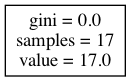

In [14]:
# Show graph
Image(graph.create_png())

In [15]:
# Create PNG
graph.write_png("engineering_AS_segment2_workflowS3_decisiontree.png")






True

In [16]:
zero_one_table['Release Offer'].value_counts()

1    23
Name: Release Offer, dtype: int64

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5,
                             random_state = 0)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [18]:
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

[[6]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [19]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

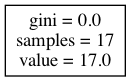

In [20]:
# Show graph
Image(graph.create_png())

In [21]:
# Create PNG
graph.write_png("engineering_AS_segment2_workflowS3_decisiontree_downsampled.png")






True